In [532]:
from warnings import filterwarnings
filterwarnings('ignore')

In [533]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [534]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df = ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [536]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [537]:
df.isnull().values.any()

False

In [538]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
corr  #en yüksek korelasyon age ve charges arasında

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


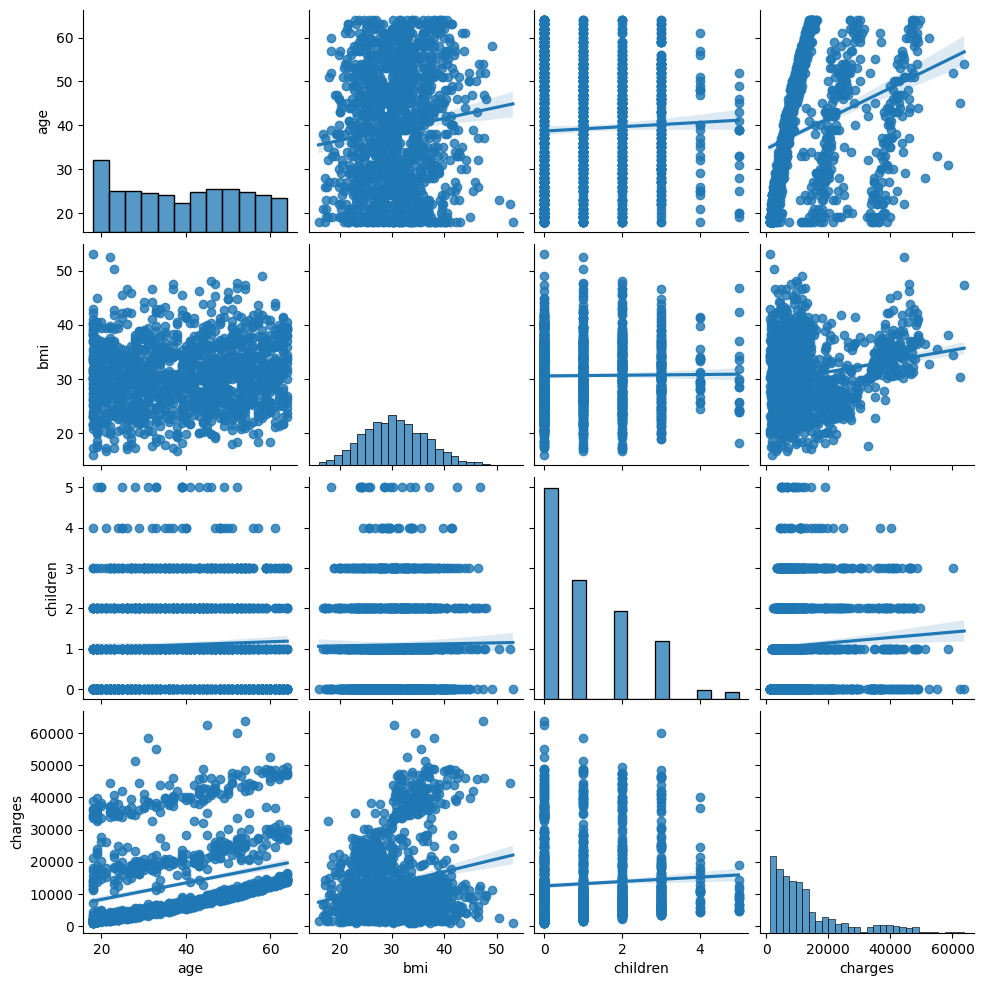

In [539]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

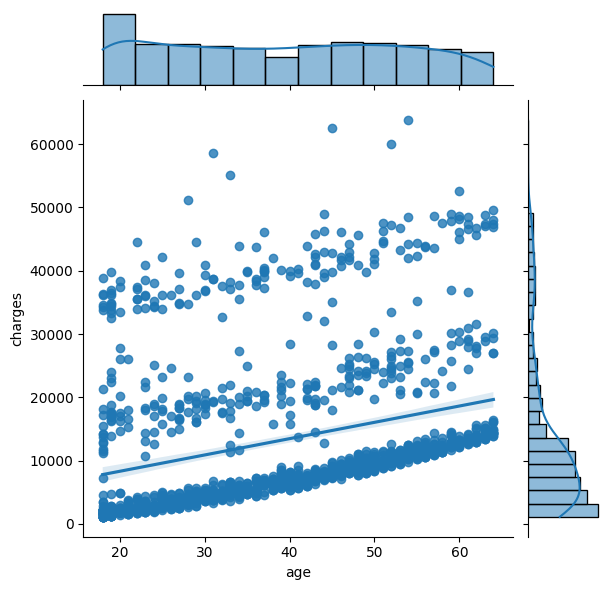

In [540]:
sns.jointplot(x = "age", y = "charges", data = df, kind = "reg")

Basit Doğrusal Fonksiyon

In [541]:
from sklearn.linear_model import LinearRegression

In [542]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

3165.8850060630284

In [543]:
model.coef_

array([257.72261867])

In [544]:
model.score(X,y)

0.08940589967885804

In [545]:
model.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [546]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [547]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)

In [548]:
model.predict([[30]]) #30 yaşındaki birinin harcamaları tahmini

array([10897.56356607])

In [549]:
yeni_veri = [[7],[17],[23]] #okula başlama ve bitirme dönemleri tahmini harcamalar

In [550]:
model.predict(yeni_veri)

array([4969.94333673, 7547.1695234 , 9093.5052354 ])

In [551]:
y_true = y[0:10]
y_pred = reg.predict(X)[0:10]

In [552]:
from sklearn.metrics import mean_squared_error, r2_score

In [553]:
lin_r2 = r2_score(y_true, y_pred)
lin_r2

0.2116759698756986

In [554]:
lin_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
lin_rmse

7674.588546279203

HATA TESPİTİ    

In [555]:
from sklearn.metrics import mean_squared_error, r2_score

In [556]:
reg.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [557]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [558]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

k_t

,gercek_y,tahmin_y
0,16884.92400,8062.614761
1,1725.55230,7804.892142
2,4449.46200,10382.118329
3,21984.47061,11670.731422
4,3866.85520,11413.008803
5,3756.62160,11155.286185
6,8240.58960,15021.125465
7,7281.50560,12701.621897
8,6406.41070,12701.621897
9,28923.13692,18629.242126


In [559]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,16884.92400,8062.614761,8822.309239
1,1725.55230,7804.892142,-6079.339842
2,4449.46200,10382.118329,-5932.656329
3,21984.47061,11670.731422,10313.739188
4,3866.85520,11413.008803,-7546.153603
5,3756.62160,11155.286185,-7398.664585
6,8240.58960,15021.125465,-6780.535865
7,7281.50560,12701.621897,-5420.116297
8,6406.41070,12701.621897,-6295.211197
9,28923.13692,18629.242126,10293.894794


In [560]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,16884.92400,8062.614761,8822.309239,7.783314e+07
1,1725.55230,7804.892142,-6079.339842,3.695837e+07
2,4449.46200,10382.118329,-5932.656329,3.519641e+07
3,21984.47061,11670.731422,10313.739188,1.063732e+08
4,3866.85520,11413.008803,-7546.153603,5.694443e+07
5,3756.62160,11155.286185,-7398.664585,5.474024e+07
6,8240.58960,15021.125465,-6780.535865,4.597567e+07
7,7281.50560,12701.621897,-5420.116297,2.937766e+07
8,6406.41070,12701.621897,-6295.211197,3.962968e+07
9,28923.13692,18629.242126,10293.894794,1.059643e+08


In [561]:
np.sum(k_t["hata_kare"])

588993093.5467993

In [562]:
np.sqrt(np.mean(k_t["hata_kare"]))

7674.588546279203

ÇOKLU DOĞRUSAL REGRESYON


--MODELLING

In [563]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [564]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [565]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df= ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [566]:
df["sex"].replace({"female":0, "male":1}, inplace=True)
df["sex"].head(3)


0    0
1    1
2    1
Name: sex, dtype: int64

In [567]:
df["smoker"].replace({"no":0, "yes":1}, inplace=True)

In [568]:

df_encoded = pd.get_dummies(df, columns=['region']) 
df_encoded = df_encoded.astype(int)

df_encoded['is_south'] = df['region'].isin(['southeast','southwest']).astype(int)
df_encoded['is_east'] = df['region'].isin(['northeast','northwest']).astype(int)




df_encoded.drop(['region_southeast','region_southwest', 'region_northeast', 'region_northwest'], axis=1, inplace= True )
df_encoded

,age,sex,bmi,children,smoker,charges,is_south,is_east
0,19,0,27,0,1,16884,1,0
1,18,1,33,1,0,1725,1,0
2,28,1,33,3,0,4449,1,0
3,33,1,22,0,0,21984,0,1
4,32,1,28,0,0,3866,0,1
...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1
1334,18,0,31,0,0,2205,0,1
1335,18,0,36,0,0,1629,1,0
1336,21,0,25,0,0,2007,1,0


In [569]:
X = df_encoded.drop("charges", axis = 1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 7)


In [570]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [571]:
df_encoded.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_south',
       'is_east'],
      dtype='object')

In [572]:

model.intercept_

-12204.15764081374

In [573]:

model.coef_ # 

array([ 2.56814745e+02, -1.97613631e+01,  3.36610179e+02,  4.24657921e+02,
        2.36707168e+04, -2.82910849e+02,  2.82910849e+02])

In [574]:
y_pred = model.predict(X_test)
mult_reg_r2 = r2_score(y_test, y_pred)
mult_reg_r2

0.784022724528649

In [575]:
multi_rmse = mean_squared_error(y_test, y_pred, squared=False)
multi_rmse

5790.52072700817

In [576]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [577]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [578]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-1.72526996e+00, -1.44446932e+00, -3.27757794e-01,
        -9.03117473e-01,  8.01450364e-01, -1.66573190e-01,
         3.15170764e-17]])

In [579]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [580]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:7]

array([ 30.05,  45.82,  61.05,  74.92,  88.19, 100.  , 100.  ])

In [581]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [582]:
pcr_model.intercept_

13267.445663010967

In [583]:
pcr_model.coef_

array([ 5.45451701e+02,  1.11058077e+03,  6.80792130e+03,  5.99115656e+02,
       -7.71164344e+03, -1.13980005e+03, -7.63986543e-25])

In [584]:
y_pred = pcr_model.predict(X_reduced_train)

In [585]:

new_data = [[30], [1],[21],[0],[1],[2]] #30 yaşında bim' 21 olan sigara içen biri için harcama tahmini
new_data = pd.DataFrame(new_data).T

In [588]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,is_south,is_east
0,19,0,27,0,1,16884,1,0
1,18,1,33,1,0,1725,1,0
2,28,1,33,3,0,4449,1,0
3,33,1,22,0,0,21984,0,1
4,32,1,28,0,0,3866,0,1


Model Tunning


In [589]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [590]:
model.score(X_train, y_train)

0.7519788179003433

In [591]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

6094.399268998966

In [592]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

5636.723507598403



--Modelling

In [ ]:
import pandas as pd
ad = pd.read_csv("insurance.csv")
df = ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region']) 
df_encoded = df_encoded.astype(int)

df_encoded['is_south'] = df['region'].isin(['southeast','southwest']).astype(int)
df_encoded['is_east'] = df['region'].isin(['northeast','northwest']).astype(int)

df_encoded.drop(['sex_male','smoker_yes','region_southeast','region_southwest', 'region_northeast', 'region_northwest'], axis=1, inplace= True )
df_encoded

,age,bmi,children,charges,sex_female,smoker_no,is_south,is_east
0,19,27,0,16884,1,0,1,0
1,18,33,1,1725,0,1,1,0
2,28,33,3,4449,0,1,1,0
3,33,22,0,21984,0,1,0,1
4,32,28,0,3866,0,1,0,1
...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,0,1
1334,18,31,0,2205,1,1,0,1
1335,18,36,0,1629,1,1,1,0
1336,21,25,0,2007,1,1,1,0


In [ ]:
y = df["charges"]


In [ ]:
X_ = df.drop(["charges","sex","smoker","region"], axis = 1).astype("float64")

In [ ]:

X_.head()

,age,bmi,children
0,19.0,27.900,0.0
1,18.0,33.770,1.0
2,28.0,33.000,3.0
3,33.0,22.705,0.0
4,32.0,28.880,0.0


In [ ]:
X = pd.concat([X_, df_encoded[["sex_female", "smoker_no"]]], axis = 1)
X.head()

,age,bmi,children,sex_female,smoker_no
0,19.0,27.900,0.0,1,0
1,18.0,33.770,1.0,0,1
2,28.0,33.000,3.0,0,1
3,33.0,22.705,0.0,0,1
4,32.0,28.880,0.0,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   float64
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   float64
 3   sex_female  1338 non-null   int32  
 4   smoker_no   1338 non-null   int32  
dtypes: float64(3), int32(2)
memory usage: 41.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (1003, 5)
y_train (1003,)
X_test (335, 5)
y_test (335,)
training (1338, 7)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [ ]:
X_reduced_train[0:1,:]

array([[ 1.69127064, -0.32592751, -0.4601335 , -1.17249043, -0.11372038]])

In [ ]:
X_reduced_train.shape

(1003, 5)

In [ ]:
X_reduced_train[:,0]

array([ 1.69127064,  0.56568038, -1.50158738, ..., -0.18573027,
       -1.48000483, -0.51564548])

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] # Verinin ½ kaçını ifade ediyor

array([ 22.56,  43.9 ,  63.77,  82.69, 100.  ])

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10] 

array([ 22.56,  43.9 ,  63.77,  82.69, 100.  ])

In [ ]:
lm = LinearRegression()

In [ ]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [ ]:
pcr_model.intercept_

13267.935817337988

In [ ]:
pcr_model.coef_

array([-1751.90952852,  6768.0618618 , -2003.966619  ,  6545.22211802,
       -3584.34393122])

TAHMİN

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)

In [ ]:
y_pred[0:5]

array([ 1754.57996913,  4533.44578628, 14466.05069057, 35868.37853991,
        9996.9583838 ])

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))

6092.54026520953

In [ ]:
df["charges"].mean()

13270.422265141257

In [ ]:
pcr_r2 = r2_score(y_test, y_pred)
pcr_r2

0.7840213626987789

In [ ]:
pcr_rmse = mean_squared_error(y_test, y_pred, squared=False)
pcr_rmse

In [ ]:
pca2 = PCA()

In [ ]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

15162.132176975787

Model Tuning


In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

15162.132176975787


In [ ]:
from sklearn import model_selection

In [ ]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [ ]:
lm = LinearRegression()

In [ ]:
RMSE = []

In [ ]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [ ]:
import matplotlib.pyplot as plt

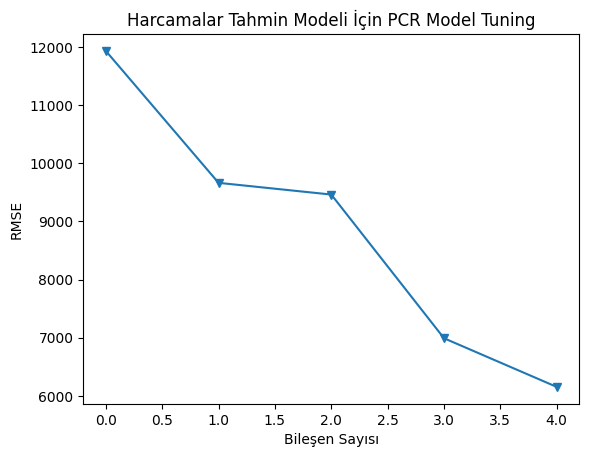

In [ ]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Harcamalar Tahmin Modeli İçin PCR Model Tuning');

PLS

--Model

In [ ]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
pls_model = PLSRegression().fit(X_train, y_train)

In [ ]:
pls_model.coef_

array([[ 3511.33789043,  2092.2067219 ,   698.68183373,  -319.19679317,
        -9541.36919707,  -214.44247257,   214.44247257]])

TAHMİN

In [ ]:
X_train.head()

,age,bmi,children,sex_female,smoker_no,is_south,is_east
560,46,19,2,1,1,0,1
1285,47,24,0,1,1,0,1
1142,52,24,0,1,1,1,0
969,39,34,5,1,1,1,0
486,54,21,3,1,1,0,1


In [ ]:
pls_model.predict(X_train)[0:10]

array([ 6956.22279178,  7781.71028878,  8171.58465238, 11251.41774032,
       10216.80267174, 17419.81921747,   686.83013625, 23747.38815264,
       13113.67384997, 33547.72802282])

In [ ]:
y_train[0:10]

560      9193
1285     8534
1142    27117
969      8596
486     12475
170     13405
277      2150
1033    13747
209      6610
947     39047
Name: charges, dtype: int32

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))

6122.449494297432

In [ ]:
pls_r2 = r2_score(y_test, y_pred)
pls_r2

0.783582729577498

In [601]:
pls_rmse = mean_squared_error(y_test, y_pred, squared=False)
pls_rmse

5886.52834514713

In [ ]:
df["charges"].mean()

13269.928998505231

MODEL TUNNING

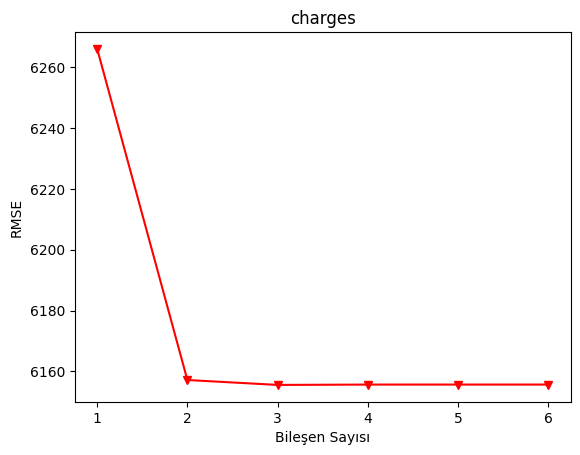

In [ ]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('charges');

In [ ]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

5796.41603147165

Ridge Regresyon


In [ ]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [ ]:
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ 2.56794448e+02, -1.89710596e+01,  3.36603879e+02,  4.24706395e+02,
        2.36570654e+04, -2.82748247e+02,  2.82748247e+02])

Tunning

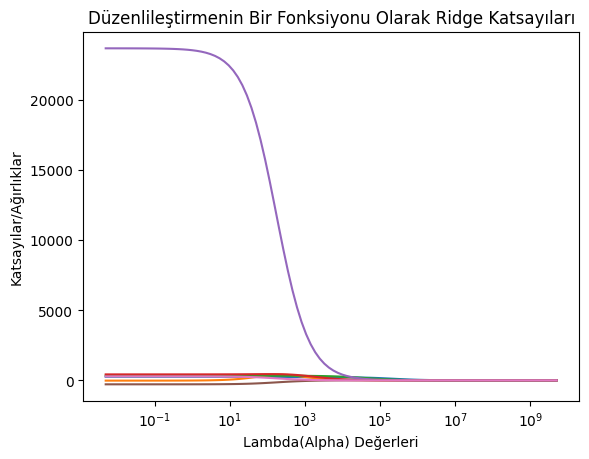

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

TAHMİN


In [595]:
y_pred = ridge_model.predict(X_test)

In [596]:
np.sqrt(mean_squared_error(y_test, y_pred))

5886.52834514713

In [597]:
ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.745841271621154

In [598]:
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_rmse

5886.52834514713

Lasso Regresyon¶


In [ ]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [ ]:
lasso_model

Lasso(alpha=0.1)

In [ ]:
lasso_model.coef_

array([ 2.56814287e+02,  3.36598202e+02,  4.24594545e+02,  1.93099872e+01,
       -2.36700570e+04, -5.65374286e+02,  0.00000000e+00])

Text(0, 0.5, 'weights')

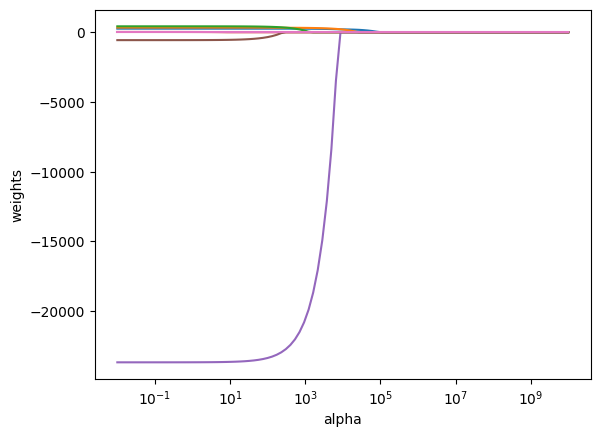

In [ ]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Tahmin

In [ ]:
lasso_model.predict(X_test)

array([ 8899.66437169,  7422.13771   , 36936.60192082,  9561.76321585,
       27043.64003946, 10787.59782726,   363.50922281, 16949.81516221,
         991.84679512, 11342.00068088, 28220.81912975,  9536.08824571,
        5147.05975978, 38388.6153465 , 40037.03532321, 36874.44228202,
       15083.71665995, 35795.96132132,  9176.30443233, 31543.50189977,
        3779.28159466, 10157.53893613,  2471.61056231,  6856.12151061,
       11618.12495484, 12717.99127415, 14703.29731306,  6384.59276362,
        9749.89114675,  2214.79627559,  9245.80054772, 13151.83593268,
        4350.94192949,  3452.45540587,  4693.90511401, 12743.54011784,
        2082.75086117,  8742.45977381, 33606.22862165, 32615.09597857,
        3940.69686974,  4568.62045504, 14100.63471089, 11626.5653091 ,
        8599.19067385, 12158.98197077,  5428.90710351,  3286.00069415,
       35261.98507496,  9095.35670529, 15810.33837484,  2302.79261865,
       12576.56961945,  1433.77775535, 13320.13197732, 12520.61322942,
      

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

5790.5739851957105

Model Tuning

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         )

In [ ]:

lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [ ]:

lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [ ]:

lasso_tuned.fit(X_train, y_train)


Lasso(alpha=47.6121039514368)

In [ ]:

y_pred = lasso_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

5812.932128790787

In [ ]:
lasso_r2 = r2_score(y_test, y_pred)
lasso_r2

0.7823476694925825

In [ ]:
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasso_rmse

ElasticNet Regresyonu

Modeling

In [ ]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [ ]:
X.head()

,age,bmi,children,sex_female,smoker_no,is_south,is_east
0,19,27,0,1,0,1,0
1,18,33,1,0,1,1,0
2,28,33,3,0,1,1,0
3,33,22,0,0,1,0,1
4,32,28,0,0,1,0,1


In [ ]:
from sklearn.linear_model import ElasticNet

In [607]:
enet_model = ElasticNet().fit(X_train, y_train)

In [608]:
enet_model.coef_

array([ 261.46264448,  453.20004215,  322.84159139,  444.15819559,
       5899.26237184, -194.6609605 ,  194.66097344])

In [609]:
enet_model.intercept_

-8424.172670181195

Tahmin

In [605]:
enet_model

ElasticNet()

In [610]:
enet_model.predict(X_test)

array([13804.41799281,  7800.18134137, 14824.72378838, 18487.23132243,
       12550.49974245, 20160.99351873,  5732.41101725, 14711.56382007,
        7034.62284401, 11997.12202947, 10820.07657692,  7947.73827457,
       17727.79894961,  9882.09490768, 19514.44212828, 15777.30170573,
       15657.59905217,  8959.38564154, 10572.15230888,  8259.92406877,
       11584.85754752, 10059.7101561 , 21665.77615453,  6108.28525566,
        6998.40526149, 20809.526138  ,  7606.64032906,  8624.53764425,
       13939.46263745,  7154.13583357, 20040.72273638, 16362.85756723,
        5081.62643883,  9591.6211288 ,  5609.65312342, 15766.45624454,
       14897.14195044, 14021.88983682,  5262.51837531, 14257.98035997,
       19749.16999289, 16688.88652473, 14373.17083963,  8760.7432336 ,
       18906.6798006 ,  9633.11276797, 13353.71711196,  9612.66938126,
       13829.40669619,  8692.82160143, 13528.06636318, 13621.33902374,
       17750.74149762,  8428.11405269, 25515.88688138, 10332.79578853,
      

In [611]:
y_pred = enet_model.predict(X_test) 

In [612]:
enet_r2 = r2_score(y_test, y_pred)
enet_r2

0.32793657165324663

In [613]:
enet_rmse = mean_squared_error(y_test, y_pred, squared=False)
enet_rmse

9572.202039719765

Tunning

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [ ]:
enet_cv_model.alpha_

95.2242079028736

In [ ]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [ ]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [ ]:
y_pred = enet_tuned.predict(X_test)

In [258]:
np.sqrt(mean_squared_error(y_test, y_pred))

11589.840501461826

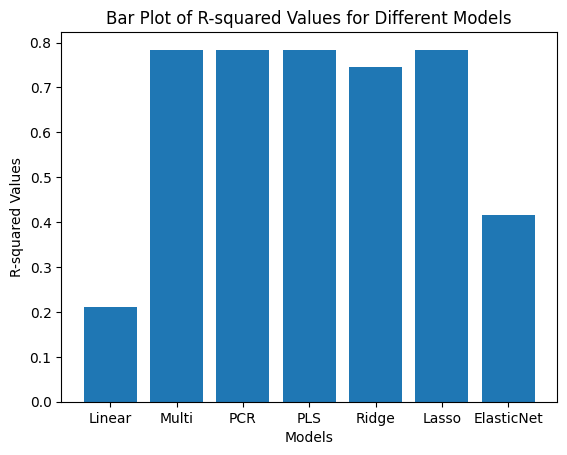

In [599]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PCR', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [lin_r2, mult_reg_r2, pcr_r2, pls_r2, ridge_r2, lasso_r2, enet_r2]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('Bar Plot of R-squared Values for Different Models')

plt.show()

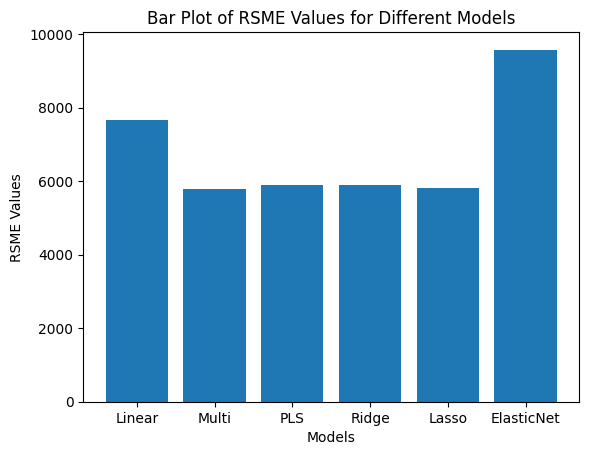

In [614]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [lin_rmse, multi_rmse, pls_rmse, ridge_rmse, lasso_rmse, enet_rmse]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('RSME Values')
plt.title('Bar Plot of RSME Values for Different Models')

plt.show()